# IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORT DATASET

In [2]:
df=pd.read_csv("age_salary.zip")
df.head()

,age,Salary
0,21.0,39343
1,21.5,46205
2,21.7,37731
3,22.0,43525
4,22.2,39891


# PLOTING THE DATA TO MAKE CLUSTERS

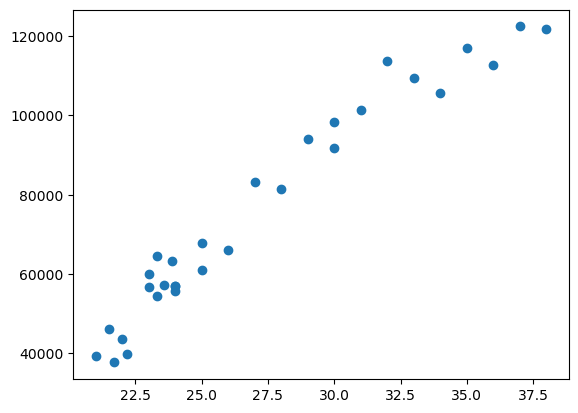

In [3]:
plt.scatter(df['age'],df['Salary'])

# CLUSTERING

In [4]:
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [5]:
y_predicted=km.fit_predict(df[["age","Salary"]])
y_predicted

f:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0])

# ADDING ANOTER COLUMN TO KNOW THE DATA BELONGING TO CLUSTER

In [6]:
df['cluster']=y_predicted
df.head()

,age,Salary,cluster
0,21.0,39343,2
1,21.5,46205,2
2,21.7,37731,2
3,22.0,43525,2
4,22.2,39891,2


# NOW CODING TO VISUALIZE THE CLUSTERS IN DATASETS

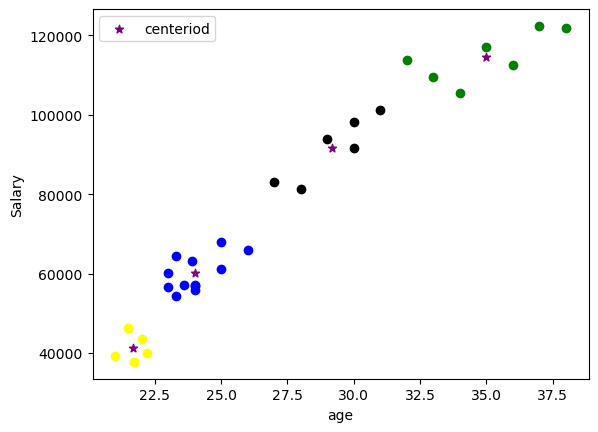

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
plt.scatter(df1.age,df1['Salary'],color='green')
plt.scatter(df2.age,df2['Salary'],color='blue')
plt.scatter(df3.age,df3['Salary'],color='yellow')
plt.scatter(df4.age,df4['Salary'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label="centeriod")
plt.xlabel("age")
plt.ylabel("Salary")
plt.legend()

In [10]:
'''in case of improper clustering'''
"""scaler=MinMaxScaler()
scaler.fit(df[['Salary']])
df['Salary']=scaler.transform(df['Salary'])
df"""

"scaler=MinMaxScaler()\nscaler.fit(df[['Salary']])\ndf['Salary']=scaler.transform(df['Salary'])\ndf"

In [13]:
#it can tell about the centriods of all four clusters
km.cluster_centers_

array([[3.50000000e+01, 1.14670286e+05],
       [2.40083333e+01, 6.00832500e+04],
       [2.16800000e+01, 4.13390000e+04],
       [2.91666667e+01, 9.16173333e+04]])

In [ ]:
def optimizer(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertias_)
        

In [ ]:
fig=plt.subplots(figsize=(10,5))
plt.plot(means,inertias,'o-')
plt.xlabel('number of clusters')
plt.ylabel('inertias')
plt.grid(True)
plt.show()